#**스마트폰 센서 데이터 기반 모션 분류**
# 단계3 : 단계별 모델링


## 0.미션

단계별로 나눠서 모델링을 수행하고자 합니다.  

* 단계1 : 정적(0), 동적(1) 행동 분류 모델 생성
* 단계2 : 세부 동작에 대한 분류모델 생성
    * 단계1 모델에서 0으로 예측 -> 정적 행동 3가지 분류 모델링
    * 단계1 모델에서 1으로 예측 -> 동적 행동 3가지 분류 모델링 
* 모델 통합
    * 두 단계 모델을 통합하고, 새로운 데이터에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
* 성능 비교
    * 기본 모델링의 성능과 비교
    * 모든 모델링은 [다양한 알고리즘 + 성능 튜닝]을 수행해야 합니다.


## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용

 <br/>  

* 세부 요구사항
    - data01_train.csv 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - data01_test.csv 를 불러와 'new_data' 이름으로 저장합니다.


In [4]:
import joblib
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.12_미니프로젝트5차_3_5일차 실습자료/data01_train.csv'
fi_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.12_미니프로젝트5차_3_5일차 실습자료/feature_importances.pkl'
data = pd.read_csv(data_path)
fi = joblib.load(fi_path)

In [5]:
data.drop('subject', axis=1, inplace=True)

## 2.데이터 전처리

* 세부 요구사항
    - Label 추가 : data 에 Activity_dynamic 를 추가합니다. Activity_dynamic은 과제1에서 is_dynamic과 동일한 값입니다.
    - x와 y1, y2로 분할하시오.
        * y1 : Activity
        * y2 : Activity_dynamic
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [6]:
is_dynamic = {
    'STANDING' : 0,
    'SITTING' : 0,
    'LAYING' : 0,
    'WALKING' : 1,
    'WALKING_UPSTAIRS' : 1,
    'WALKING_DOWNSTAIRS' : 1
}
data['Activity_dynamic'] = data['Activity'].replace(is_dynamic)

In [7]:
x = data.drop(columns=['Activity', 'Activity_dynamic'])
y1 = data.loc[:, 'Activity']
y2 = data.loc[:, 'Activity_dynamic']

In [8]:
x_train_all, x_val_all, y_train_all, y_val_all = train_test_split(x, y1, test_size=0.2, random_state=42, stratify=y1)
x_train_dynamic, x_val_dynamic, y_train_dynamic, y_val_dynamic = train_test_split(x, y2, test_size=0.2, random_state=42, stratify=y2)

## **3.단계별 모델링**

![](https://github.com/DA4BAM/image/blob/main/step%20by%20step.png?raw=true)

### (1) 단계1 : 정적/동적 행동 분류 모델

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)과 동적 행동(동적 : Walking, Walking-Up, Walking-Down)을 구분하는 모델 생성.
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

#### 1) 알고리즘1 : 

In [10]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 11.4 MB/s eta 0:00:00
 

In [11]:
temp_data = data.drop('Activity', axis=1)

In [13]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(temp_data, target = 'Activity_dynamic', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Activity_dynamic
2,Target type,Binary
3,Original data shape,"(5881, 562)"
4,Transformed data shape,"(5881, 562)"
5,Transformed train set shape,"(4116, 562)"
6,Transformed test set shape,"(1765, 562)"
7,Numeric features,561
8,Preprocess,True
9,Imputation type,simple


In [14]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2450
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2020
lr,Logistic Regression,0.9998,1.0000,1.0000,0.9995,0.9997,0.9995,0.9995,1.0930
knn,K Neighbors Classifier,0.9998,1.0000,1.0000,0.9995,0.9997,0.9995,0.9995,0.4050
rf,Random Forest Classifier,0.9998,1.0000,1.0000,0.9995,0.9997,0.9995,0.9995,1.7530
et,Extra Trees Classifier,0.9998,1.0000,1.0000,0.9995,0.9997,0.9995,0.9995,1.0880
dt,Decision Tree Classifier,0.9995,0.9995,0.9995,0.9995,0.9995,0.9990,0.9990,0.8020
svm,SVM - Linear Kernel,0.9995,0.0000,1.0000,0.9989,0.9995,0.9990,0.9990,0.2210
ada,Ada Boost Classifier,0.9995,0.9995,0.9995,0.9995,0.9995,0.9990,0.9990,0.5380
gbc,Gradient Boosting Classifier,0.9995,0.9995,0.9995,0.9995,0.9995,0.9990,0.9990,24.0760


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [15]:
print(best)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


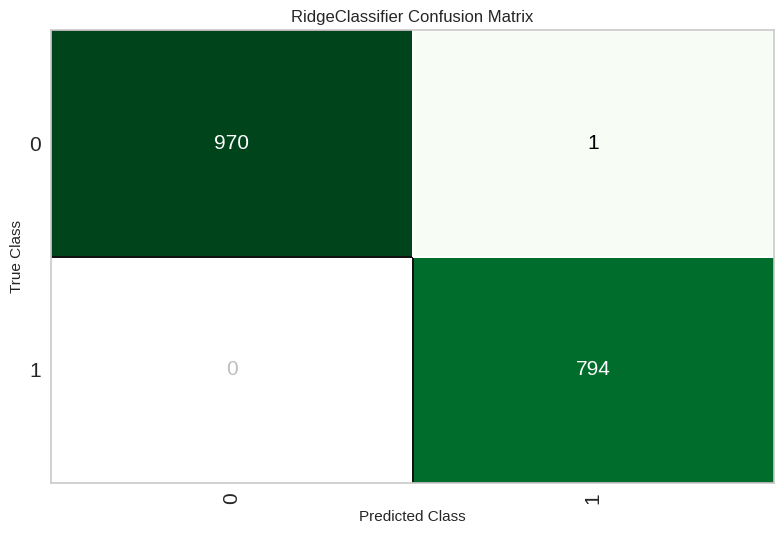

In [17]:
s.plot_model(best, plot='confusion_matrix')

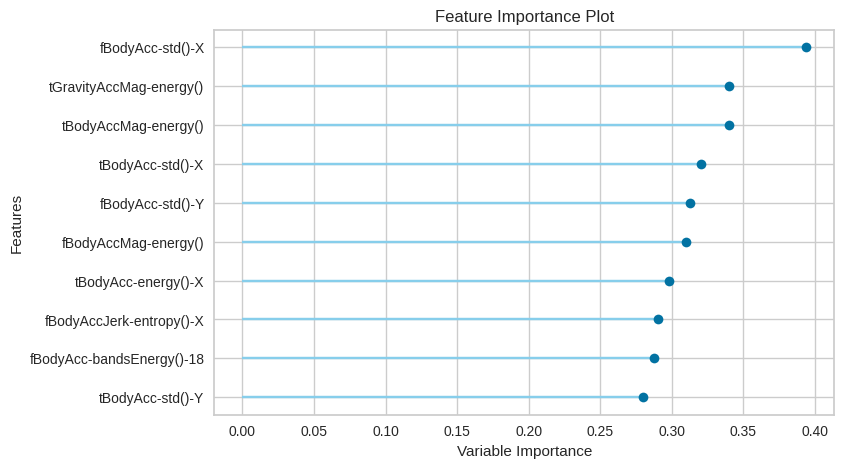

In [18]:
s.plot_model(best, plot='feature')

In [24]:
fi.sort_values(by='feature_importance_dynamic', ascending=False)['feature_name'][:10]

86                tBodyAccJerk-mad()-X
393    fBodyAccJerk-bandsEnergy()-1,24
389    fBodyAccJerk-bandsEnergy()-1,16
366           fBodyAccJerk-entropy()-X
181              tBodyGyroJerk-iqr()-Z
101               tBodyAccJerk-iqr()-Z
381     fBodyAccJerk-bandsEnergy()-1,8
353               fBodyAccJerk-max()-X
360            fBodyAccJerk-energy()-X
9                     tBodyAcc-max()-X
Name: feature_name, dtype: object

#### 2) 알고리즘2 : 

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_dynamic, y_train_dynamic)

lda.score(x_val_dynamic, y_val_dynamic)

1.0

In [27]:
y_pred = lda.predict(x_val_dynamic)
print(confusion_matrix(y_val_dynamic, y_pred))
print(classification_report(y_val_dynamic, y_pred))

[[647   0]
 [  0 530]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       1.00      1.00      1.00       530

    accuracy                           1.00      1177
   macro avg       1.00      1.00      1.00      1177
weighted avg       1.00      1.00      1.00      1177



In [60]:
# is_dynamic 분류 모델 선정
is_dy_model = LinearDiscriminantAnalysis()
is_dy_model.fit(x_train_dynamic, y_train_dynamic)

is_dy_model.score(x_val_dynamic, y_val_dynamic)

1.0

### (2) 단계2-1 : 정적 동작 세부 분류

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)인 데이터 추출
    * Laying, Sitting, Standing 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [36]:
static_data = data[data['Activity_dynamic'] == 0].reset_index(drop=True)
x_static = static_data.drop(columns=['Activity', 'Activity_dynamic'])
y_static = static_data['Activity']

x_train_static, x_val_static, y_train_static, y_val_static = train_test_split(
    x_static, y_static, test_size=0.2, random_state=42, stratify=y_static
)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_static, y_train_static)

model.score(x_val_static, y_val_static)

0.9845440494590417

In [39]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_static, y_train_static)

model.score(x_val_static, y_val_static)

0.9783616692426584

In [41]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier()
model.fit(x_train_static, y_train_static)

model.score(x_val_static, y_val_static)

0.9768160741885626

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_static, y_train_static)

model.score(x_val_static, y_val_static)

0.9783616692426584

In [44]:
# static 분류 모델 선정
from sklearn.linear_model import LogisticRegression
static_model = LogisticRegression()
static_model.fit(x_train_static, y_train_static)

static_model.score(x_val_static, y_val_static)

0.9845440494590417

### (3) 단계2-2 : 동적 동작 세부 분류

* 세부 요구사항
    * 동적 행동(Walking, Walking Upstairs, Walking Downstairs)인 데이터 추출
    * Walking, Walking Upstairs, Walking Downstairs 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [45]:
dy_data = data[data['Activity_dynamic'] == 1].reset_index(drop=True)
x_dy = dy_data.drop(columns=['Activity', 'Activity_dynamic'])
y_dy = dy_data['Activity']

x_train_dy, x_val_dy, y_train_dy, y_val_dy = train_test_split(
    x_dy, y_dy, test_size=0.2, random_state=42, stratify=y_dy
)

In [49]:
model = LogisticRegression()
model.fit(x_train_dy, y_train_dy)

model.score(x_val_dy, y_val_dy)

0.9867924528301887

In [55]:
model = LinearDiscriminantAnalysis()
model.fit(x_train_dy, y_train_dy)

print(model.score(x_val_dy, y_val_dy))
print(confusion_matrix(y_val_dy, model.predict(x_val_dy)))

1.0
[[200   0   0]
 [  0 158   0]
 [  0   0 172]]


In [56]:
model = RidgeClassifier()
model.fit(x_train_dy, y_train_dy)

print(model.score(x_val_dy, y_val_dy))
print(confusion_matrix(y_val_dy, model.predict(x_val_dy)))

1.0
[[200   0   0]
 [  0 158   0]
 [  0   0 172]]


In [52]:
model = RandomForestClassifier()
model.fit(x_train_dy, y_train_dy)

model.score(x_val_dy, y_val_dy)

0.9754716981132076

In [61]:
# dynamic 분류 모델 선정
dynamic_model = LinearDiscriminantAnalysis()
dynamic_model.fit(x_train_dy, y_train_dy)

print(dynamic_model.score(x_val_dy, y_val_dy))

1.0


### (4) 분류 모델 합치기


* 세부 요구사항
    * 두 단계 모델을 통합하고, 새로운 데이터(test)에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
    * 데이터 파이프라인 구축 : test데이터가 로딩되어 전처리 과정을 거치고, 예측 및 성능 평가 수행

![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

#### 1) 함수 만들기

In [93]:
temp_data = data.drop(['Activity', 'Activity_dynamic'], axis=1)

In [94]:
# 정적, 동적 예측 결과 저장
temp_data['is_dynamic'] = is_dy_model.predict(temp_data)

In [95]:
# 정적과 동적 예측 결과에 따라 나누기
# reset_index로 원래의 index 를 column으로 빼서 나중에 concat 후 사용
temp_static = temp_data[temp_data['is_dynamic'] == 0].reset_index()
temp_dynamic = temp_data[temp_data['is_dynamic'] == 1].reset_index()

In [97]:
# 정적, 동적 별로 각 Class 예측
temp_static['label'] = static_model.predict( temp_static.drop(['is_dynamic', 'index'], axis=1) )
temp_dynamic['label'] = dynamic_model.predict( temp_dynamic.drop(['is_dynamic', 'index'], axis=1) )

In [102]:
# 각 예측 결과를 합치고, index로 정렬
result_df = pd.concat([temp_static, temp_dynamic], axis=0).sort_values(by='index').set_index('index')

In [105]:
# y_pred 뽑기
y_pred = result_df['label'].values

In [106]:
y_pred

array(['STANDING', 'LAYING', 'STANDING', ..., 'LAYING',
       'WALKING_UPSTAIRS', 'SITTING'], dtype=object)

In [111]:
def my_model_predict(x):
    """
    params:
        x : DataFrame. Features
    ret:
        y_pred : numpy array

    model1 : 정적 동적 구분 (LDA 모델 사용 (LinearDiscriminantAnalysis))
    model2-1 : 정적으로 구분한 것을 세부 Class 분류 (Logistic Regression 모델 사용)
    model2-1 : 동적으로 구분한 것을 세부 Class 분류 (LDA 모델 사용 (LinearDiscriminantAnalysis))
    """
    # x data copy
    temp_data = x.copy()

    # 정적, 동적 예측 결과 저장
    temp_data['is_dynamic'] = is_dy_model.predict(temp_data)

    # 정적과 동적 예측 결과에 따라 나누기
    # reset_index로 원래의 index 를 column으로 빼서 나중에 concat 후 사용
    temp_static = temp_data[temp_data['is_dynamic'] == 0].reset_index()
    temp_dynamic = temp_data[temp_data['is_dynamic'] == 1].reset_index()

    # 정적, 동적 별로 각 Class 예측
    temp_static['label'] = static_model.predict( temp_static.drop(['is_dynamic', 'index'], axis=1) )
    temp_dynamic['label'] = dynamic_model.predict( temp_dynamic.drop(['is_dynamic', 'index'], axis=1) )

    # 각 예측 결과를 합치고, index로 정렬
    result_df = pd.concat([temp_static, temp_dynamic], axis=0).sort_values(by='index').set_index('index')

    # y_pred 뽑기
    y_pred = result_df['label'].values

    return y_pred

In [112]:
y_pred = my_model_predict(data.drop(['Activity', 'Activity_dynamic'], axis=1))
y = data['Activity'].values
print(f"Accuracy Score : {accuracy_score(y, y_pred)}")
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

Accuracy Score : 0.9920081618772317
[[1115    0    0    0    0    0]
 [   1 1010   21    0    0    0]
 [   0   25 1062    0    0    0]
 [   0    0    0  998    0    0]
 [   0    0    0    0  791    0]
 [   0    0    0    0    0  858]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1115
           SITTING       0.98      0.98      0.98      1032
          STANDING       0.98      0.98      0.98      1087
           WALKING       1.00      1.00      1.00       998
WALKING_DOWNSTAIRS       1.00      1.00      1.00       791
  WALKING_UPSTAIRS       1.00      1.00      1.00       858

          accuracy                           0.99      5881
         macro avg       0.99      0.99      0.99      5881
      weighted avg       0.99      0.99      0.99      5881

